In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_hdf('Data.h5')

In [4]:
data.head()

,610FIC098 DACA.PV,610PIC002 PID_PLA.PV,610PIC002 PID_PLA.SP,610PIC002 PID_PLA.OP,610TI001 DACA.PV,610TI002 DACA.PV,610TI004 DACA.PV,610PDI124A DACA.PV,610PDI124B DACA.PV,610FI001 DACA.PV,...,610PV041A SWITCHA.OP,610PV041B SWITCHA.OP,610FV048A AUTOMANA.OP,610FV048B AUTOMANA.OP,610FY047 OVRDSELA.OP,610TIC088 PID_PLA.PV.1,610TIC088 PID_PLA.OP.1,610TIC088 PID_PLA.SP.1,610TV182A SWITCHA.OP,610TV182B SWITCHA.OP
DATE AND TIME,,,,,,,,,,,,,,,,,,,,,
2018-09-01 00:00:00,7499.013672,1.218441,1.2,53.367477,27.346800,243.832260,240.098770,0.015847,0.007047,6743.284668,...,76.363525,10.0,46.000000,5.1,0.0,423.010559,23.000000,423.010559,17.0,26.0
2018-09-01 00:01:00,7551.958984,1.206157,1.2,53.573505,27.356628,243.854996,240.131516,0.015598,0.006995,6733.831543,...,76.046883,10.0,46.000000,5.1,0.0,422.993652,23.000000,422.993652,17.0,26.0
2018-09-01 00:02:00,7466.616699,1.203238,1.2,53.549259,27.215054,243.852661,240.328247,0.015659,0.006910,6752.866211,...,76.111603,10.0,46.000000,5.1,0.0,422.985138,23.000000,422.985138,17.0,26.0
2018-09-01 00:03:00,7535.733887,1.198222,1.2,53.253944,27.281755,243.828598,240.317535,0.015795,0.006793,6748.151367,...,76.250168,10.0,46.000000,5.1,0.0,422.959717,23.000000,422.959717,17.0,26.0
2018-09-01 00:04:00,7462.890625,1.191046,1.2,52.195477,27.286066,243.976868,240.375031,0.015478,0.006751,6740.555176,...,76.180664,10.0,45.760117,5.1,0.0,422.963959,22.871855,422.899994,17.0,26.0


In [38]:
window_size = 1000

rolling_means = data.rolling(window_size).mean()
rolling_stds = data.rolling(window_size).std()
anomalies = rolling_stds > rolling_stds.mean() + 1.5 * rolling_stds.std()

345
610TI059GB PV


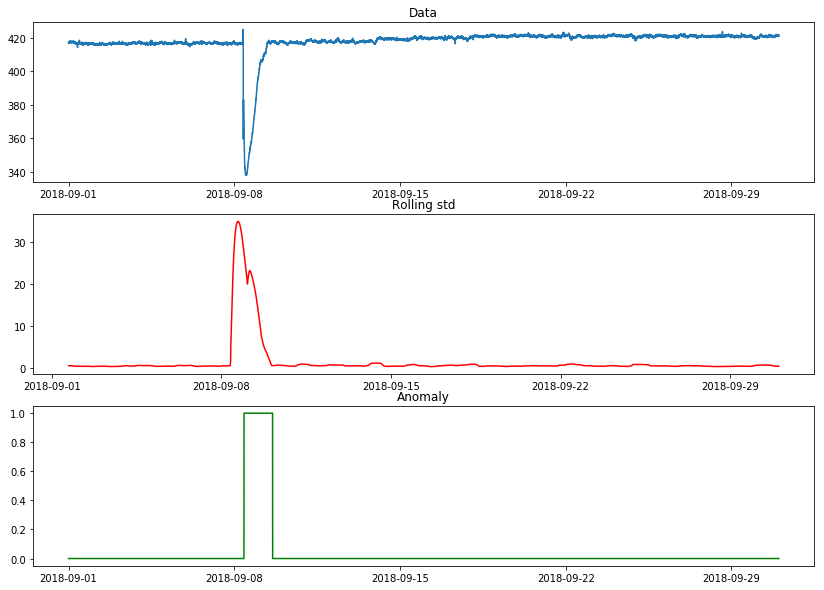

In [44]:

i=np.random.randint(data.shape[1])
print(i)
print(data.columns[i])
# i=68

plt.figure(figsize=(14,10))
plt.subplot(3,1,1)
plt.title('Data')
plt.plot(data.index, data.iloc[:,i])

plt.subplot(3,1,2)
plt.title('Rolling std')
plt.plot(data.index, rolling_stds.iloc[:,i], color='red')

plt.subplot(3,1,3)
plt.title('Anomaly')
plt.plot(data.index, anomalies.iloc[:,i], color='green')
# plt.scatter(data.index, anomalies.iloc[:,i]*100, color='green')

In [10]:
rolling_stds.iloc[:,i].mean() + 2*rolling_stds.iloc[:,i].std()

249.73372831298644

In [13]:
np.sum(anomalies.iloc[:,i])

294